In [ ]:
import pandas as pd
import numpy as np

Limpando dados

In [ ]:
df = pd.read_csv('/content/Ecommerce_DBS.csv')
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564


In [ ]:
df['Purchase Date']= pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y', errors='coerce')
#transformando para date time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Latitude               138490 non-null  floa

In [ ]:
#verificando valores unicos de cada coluna para ver se existem missing values
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: Customer ID
[46251 13593 28805 ...  6102 15070 32206]
------------------------------
Coluna: Purchase Date
<DatetimeArray>
['2020-09-08 00:00:00', '2022-03-05 00:00:00', '2022-05-23 00:00:00',
 '2020-11-12 00:00:00', '2020-11-27 00:00:00', '2023-03-07 00:00:00',
 '2023-04-15 00:00:00', '2021-03-27 00:00:00', '2020-05-05 00:00:00',
 '2023-09-13 00:00:00',
 ...
 '2023-03-01 00:00:00', '2020-04-11 00:00:00', '2021-09-28 00:00:00',
 '2022-03-19 00:00:00', '2021-11-25 00:00:00', '2020-05-21 00:00:00',
 '2022-07-04 00:00:00', '2022-03-15 00:00:00', '2022-03-07 00:00:00',
 '2023-02-23 00:00:00']
Length: 1354, dtype: datetime64[ns]
------------------------------
Coluna: Product Category
['Electronics' 'Home' 'Clothing' 'Books']
------------------------------
Coluna: Product Price
[ 12 468 288 196 449 250  73 337 182 394 366 348 103 240 368  30 153 259
 489 232 255 227  60 285 100  28 382 400 410  70 243 131 327 405 219 218
 304  20  31 434 156 119  53 485 191 355 284  82 370 380 365 10

In [ ]:
#verificando se a nulls
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
NPS                      0
Customer Age             0
Gender                   0
Source                   0
Country                  0
State                    0
Latitude                 0
Longituide               1
dtype: int64

In [ ]:
#arrumando a coluna de estados onde existiam Kansas escrito de duas formas diferentes
df['State']=df['State'].replace('\xa0Kansas', 'Kansas')

In [ ]:
#confirmando se esta correto
df['State'].unique()

array(['Alberta', 'Ontario', 'New Mexico', 'Saskatchewan', 'California',
       'British Columbia', 'Nova', 'Alabama', 'Georgia', 'Louisiana',
       'Newfoundland and Labrador', 'Maine', 'New York', 'Manitoba',
       'Indiana', 'New Brunswick', 'Kansas', 'Prince Edward Island',
       'Quebec'], dtype=object)

In [ ]:
#verificando duplicadas
df.duplicated().sum()

0

In [ ]:
#criando a coluna de total pago para ter uma ideia do Revenue obtido
df['Total_paid'] = df['Product Price'] * df['Quantity']

In [ ]:
#confirmando se cada coluna está com seus respectivos Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Latitude               138490 non-null  floa

Tirando outliers e Colunas que não serao usadas
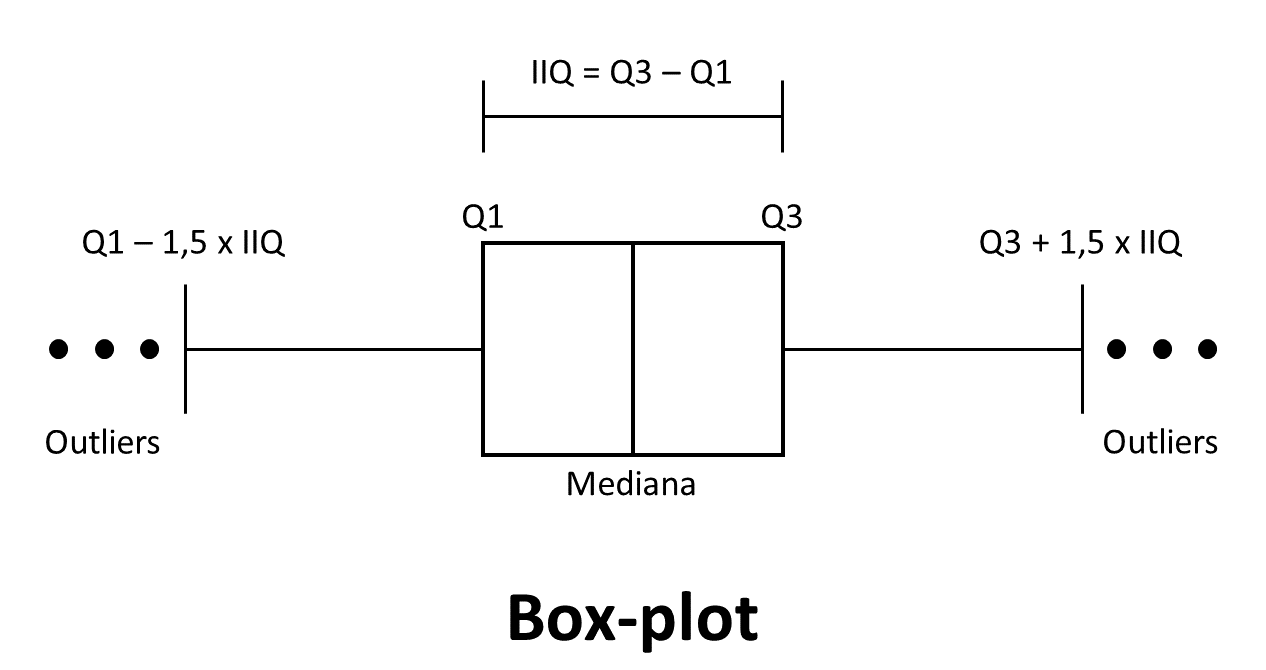

In [ ]:
df_new= df.copy()

In [ ]:
#retirando colunas que nao serão usadas
df_new.drop(['Latitude','Longituide'],axis=1, inplace=True)

In [ ]:
#verificacao visual de valores fora de padrao
df_new.describe()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Total_paid
count,138490.000000,138490,138490.000000,138490.000000,138490.000000,138490.000000,138490.000000,138490.000000
mean,24461.636349,2021-11-07 19:15:34.611885056,254.154834,3.002383,2726.686967,4.996260,43.567081,763.130168
min,1.000000,2020-01-01 00:00:00,10.000000,1.000000,100.000000,0.000000,18.000000,10.000000
25%,12474.000000,2020-12-04 00:00:00,131.000000,2.000000,1476.000000,2.000000,30.000000,288.000000
50%,25006.000000,2021-11-09 00:00:00,254.000000,3.000000,2726.000000,5.000000,43.000000,603.000000
75%,37513.000000,2022-10-13 00:00:00,377.000000,4.000000,3977.750000,8.000000,57.000000,1131.000000
max,49997.000000,2023-09-15 00:00:00,500.000000,5.000000,5350.000000,10.000000,70.000000,2500.000000
std,15116.195023,NaN,141.573045,1.414150,1444.524065,3.166743,15.415951,591.477344


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Verificando por meio do bloxplot a existencia de candidatos a outliers

<Axes: xlabel='Quantity'>

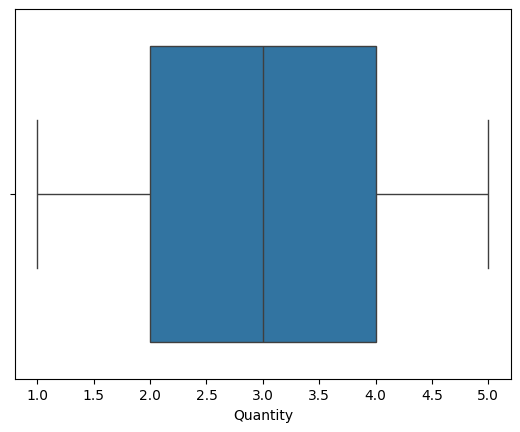

In [ ]:
sns.boxplot(x=df_new['Quantity'])

<Axes: xlabel='Total Purchase Amount'>

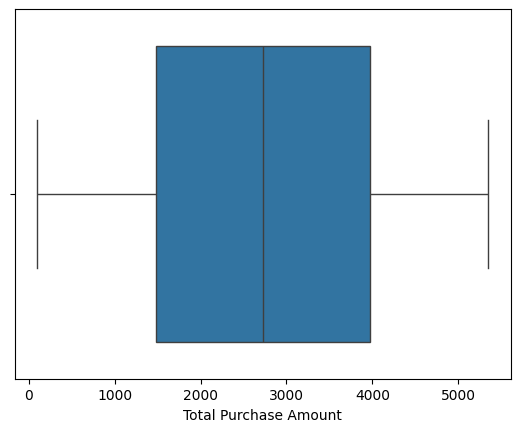

In [ ]:
sns.boxplot(x=df_new['Total Purchase Amount'])

<Axes: xlabel='NPS'>

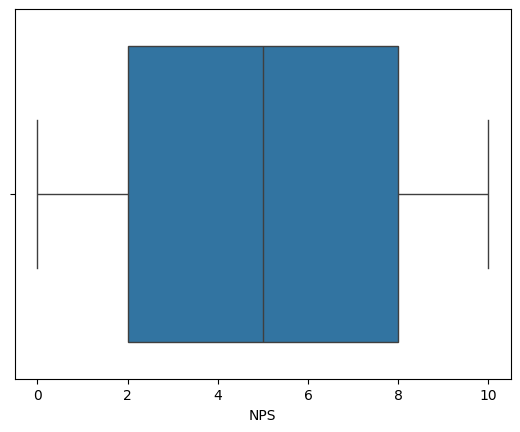

In [ ]:
sns.boxplot(x=df_new['NPS'])

<Axes: xlabel='Customer Age '>

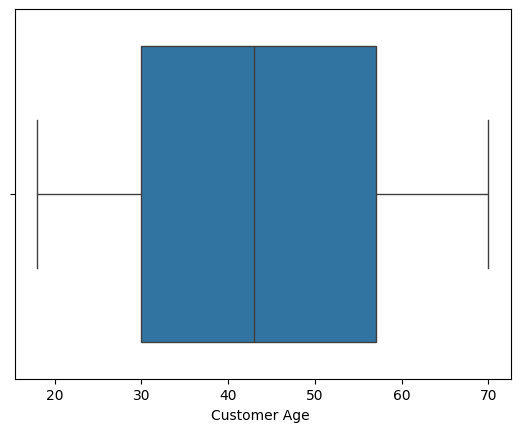

In [ ]:
sns.boxplot(x=df_new['Customer Age '])

<Axes: xlabel='Product Price'>

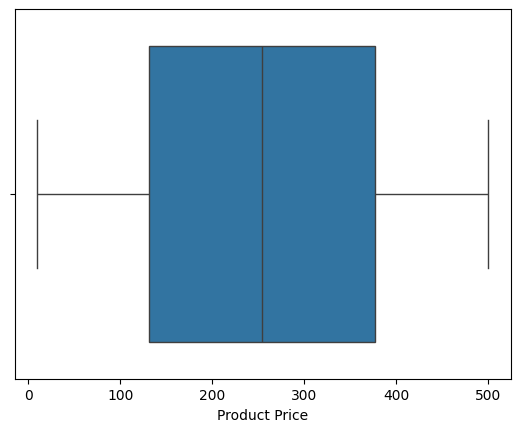

In [ ]:
sns.boxplot(x=df_new['Product Price'])

Usando bloxplot como metodo de verificar outliers, podemos ver que aparentemente não existe nenhum nas colunas quantitativas

# **Análisando os dados 1**
Qual o Tipo de Público e qual o melhor canal para vender determinado produto.

Quais os produtos mais vendidos nos ultimos anos

In [227]:
#paleta de cores ITAU
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
LARANJA1, LARANJA2 ='#f28500','#FF9252'

In [ ]:
map={
    "Total Purchase Amount": "Total_Purchase_Amount",
    "Purchase Date":"Purchase_Date",
    "Product Category":"Product_Category",
    "Customer ID":"Customer_ID"
}
df_vis1= df_new[["Purchase Date","Product Category","Total_paid"]].copy()
df_vis1.rename(columns=map,inplace=True)
df_vis1.head()

,Purchase_Date,Product_Category,Total_paid
0,2020-09-08,Electronics,36
1,2022-03-05,Home,1872
2,2022-05-23,Home,576
3,2020-11-12,Clothing,196
4,2020-11-27,Home,449


In [ ]:
df_vis1['Year'] = df_vis1.Purchase_Date.dt.year
df_vis1.drop('Purchase_Date',axis=1)

,Product_Category,Total_paid,Year
0,Electronics,36,2020
1,Home,1872,2022
2,Home,576,2022
3,Clothing,196,2020
4,Home,449,2020
...,...,...,...
138485,Clothing,852,2023
138486,Home,1320,2021
138487,Books,358,2022
138488,Home,1104,2023


In [ ]:
vendas = pd.crosstab(index=df_vis1.Year,columns=df_vis1.Product_Category, values= df_vis1.Total_paid, aggfunc='sum')

In [ ]:
vendas

Product_Category,Books,Clothing,Electronics,Home
Year,,,,
2020,8576645,8597705,5729135,5668074
2021,8306927,8458923,5816286,5809253
2022,8459545,8582291,5746345,5565533
2023,6192009,6154822,4044705,3977699


In [ ]:
vendas_normalize = pd.crosstab(index = df_vis1.Year, columns = df_vis1.Product_Category, normalize = "index")

In [ ]:
vendas_normalize

Product_Category,Books,Clothing,Electronics,Home
Year,,,,
2020,0.301491,0.299677,0.199803,0.199029
2021,0.295911,0.300655,0.202404,0.201030
2022,0.299101,0.301322,0.202023,0.197554
2023,0.302955,0.303483,0.197422,0.196141


In [ ]:
vendas.drop(2020, inplace=True)
vendas

Product_Category,Books,Clothing,Electronics,Home
Year,,,,
2021,8306927,8458923,5816286,5809253
2022,8459545,8582291,5746345,5565533
2023,6192009,6154822,4044705,3977699


In [230]:
def grafico_ecommerce():
  # Paleta
  cores = [LARANJA1, LARANJA2, AZUL4, AZUL2]

  # grafico
  ax = vendas.plot(kind='bar', stacked=True,figsize=(15,8),color=cores)

#personalizando
  ax.set_title('Vendas ecommerce dos ultimos 3 anos por categoria \n 2021 a 2023', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  ax.tick_params(axis='both',which='both',length=0)

  # # texto
  ax.text(2.35, 155e5, '60,5%', fontweight='bold', fontsize=24, color=LARANJA1)
  ax.text(2.35, 101.3e5,
         'das vendas na loja\n'
           'estão concentradas em\n'
          '$\\bf{Books}$ e $\\bf{Cloaths}$\n'
         'em 2023.',
          fontsize=15,
         linespacing=1.45,
          color=LARANJA1)

  return ax

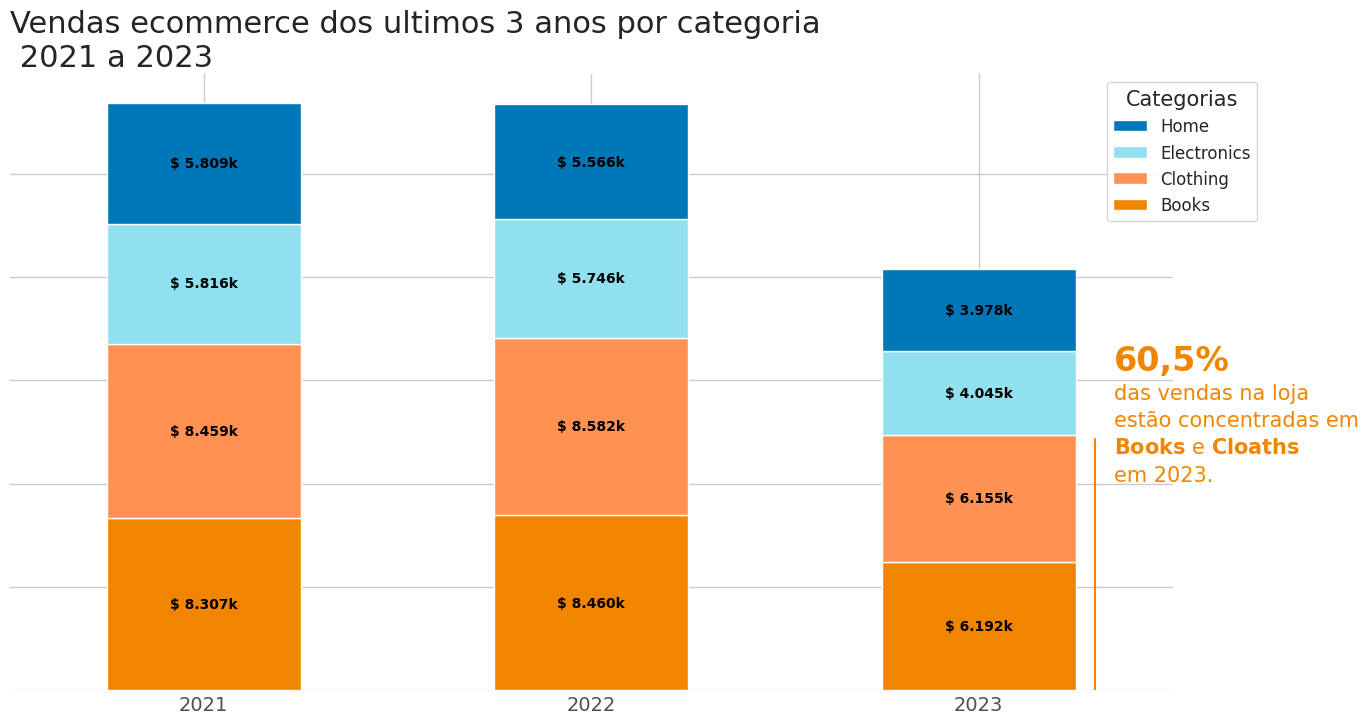

In [232]:
ax = grafico_ecommerce()

ax.legend(bbox_to_anchor=(1.08,1), reverse=True,title="Categorias",title_fontsize=15,fontsize=12)

# colcoando valores em seu respectivo lugar
for container in ax.containers:
  labels = [f'$ {valor.get_height()/1000:,.0f}k'.replace(",",".") for valor in container]
  ax.bar_label(container,label_type='center',labels= labels,size=10,color="Black", fontweight="bold")

ax.axvline(x=2.3,ymin=0,ymax=0.408,color=LARANJA1,linewidth=1.5)



fig = ax.get_figure()
plt.savefig('analise1.png')

#**Analise 2**
Agora para responder qual o produto mais caro e o mais barato

In [ ]:
df_vis2= df_new[["Product Category","Product Price"]].copy()
map={
    "Total Purchase Amount": "Total_Purchase_Amount",
    "Purchase Date":"Purchase_Date",
    "Product Category":"Product_Category",
    "Customer ID":"Customer_ID",
    "Product Price":"Product_Price"
}
df_vis2.rename(columns=map,inplace=True)
df_vis2.head()

,Product_Category,Product_Price
0,Electronics,12
1,Home,468
2,Home,288
3,Clothing,196
4,Home,449


In [ ]:
df_aa = df_vis2.groupby(['Product_Category']).aggregate("mean")


In [ ]:
df_bb = df_vis2.groupby('Product_Category')['Product_Price'].apply(lambda x: x.unique().tolist())

In [ ]:
df_aa

,Product_Price
Product_Category,
Books,253.749952
Clothing,254.044987
Electronics,254.623925
Home,254.458300


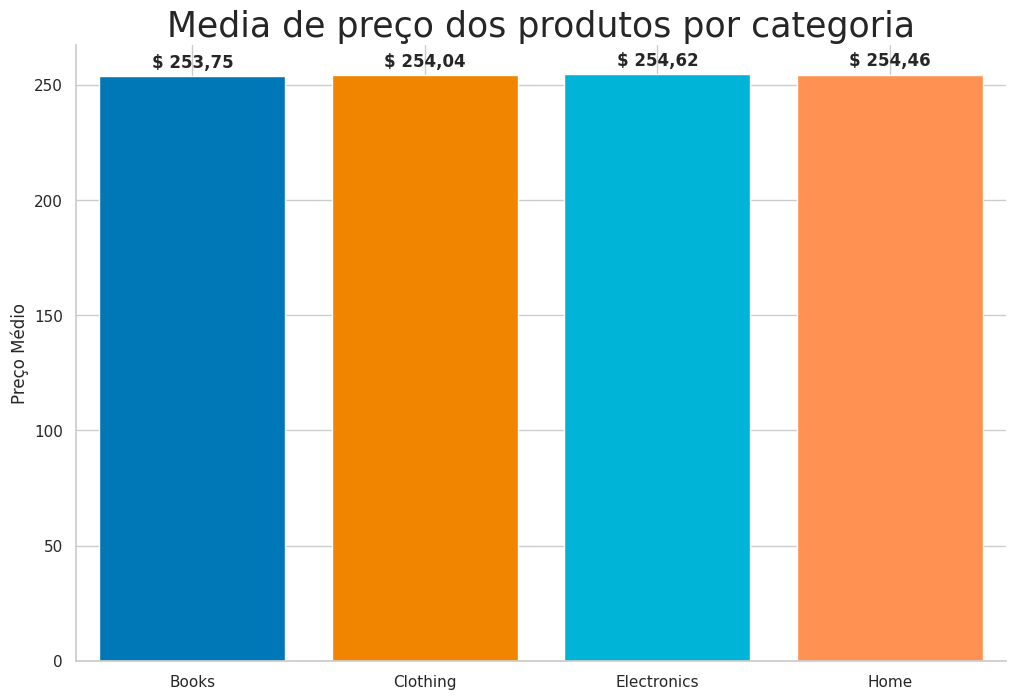

In [233]:
cores = [AZUL2, LARANJA1,AZUL3,LARANJA2]
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(df_aa.index,df_aa['Product_Price'], color=cores)

for i, valor in enumerate(df_aa['Product_Price']):
    qtd=f'$ {valor:,.2f}'.replace(".",",")

    ax.text(i,valor +6  , qtd, fontsize=12,ha='center',va='center',weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-0.5, len(df_aa['Product_Price']) - 0.5)
ax.set_title("Media de preço dos produtos por categoria",fontsize=25)
ax.set_ylabel("Preço Médio")
plt.show()







In [107]:
min_vals = df_vis2.loc[df_vis2.groupby('Product_Category')['Product_Price'].idxmin()]
min_vals
max_vals = df_vis2.loc[df_vis2.groupby('Product_Category')['Product_Price'].idxmax()]
max_vals
min_max_df = pd.concat([min_vals, max_vals]).drop_duplicates()

index_max= max_vals.index
index_min=min_vals.index
min_max_df.loc[index_max, 'Min_max'] = 'max'
min_max_df.loc[index_min, 'Min_max'] = 'min'
min_max_df




,Product_Category,Product_Price,Min_max
1531,Books,10,min
1350,Clothing,10,min
1128,Electronics,10,min
1779,Home,10,min
1222,Books,500,max
2445,Clothing,500,max
560,Electronics,500,max
923,Home,500,max


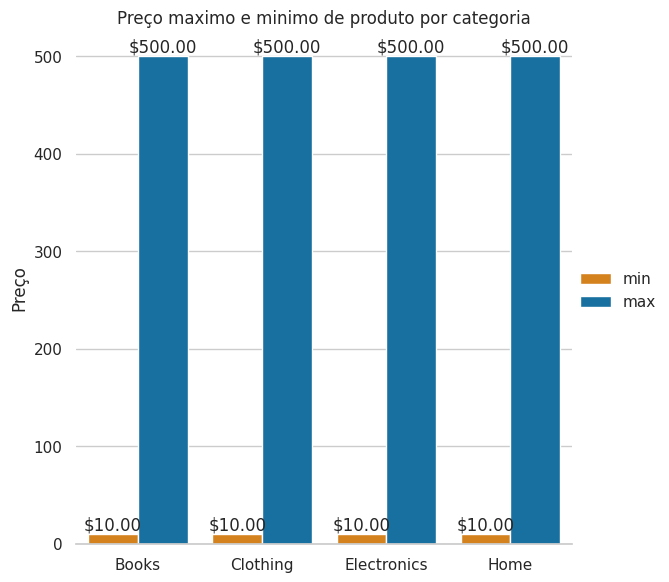

In [237]:
import seaborn as sns
sns.set_theme(style="whitegrid")


cores= LARANJA1,AZUL2
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=min_max_df, kind="bar",
    x="Product_Category", y="Product_Price", hue="Min_max",
    errorbar="sd", palette=cores, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Preço")
g.legend.set_title("")
g.set(title='Preço maximo e minimo de produto por categoria')
ax = g.axes.flat[0]

#colocando valorem em cima das barras
for c in ax.containers:
    labels = [f'${(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#**Analise 3**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Total_paid             138490 non-null  int6

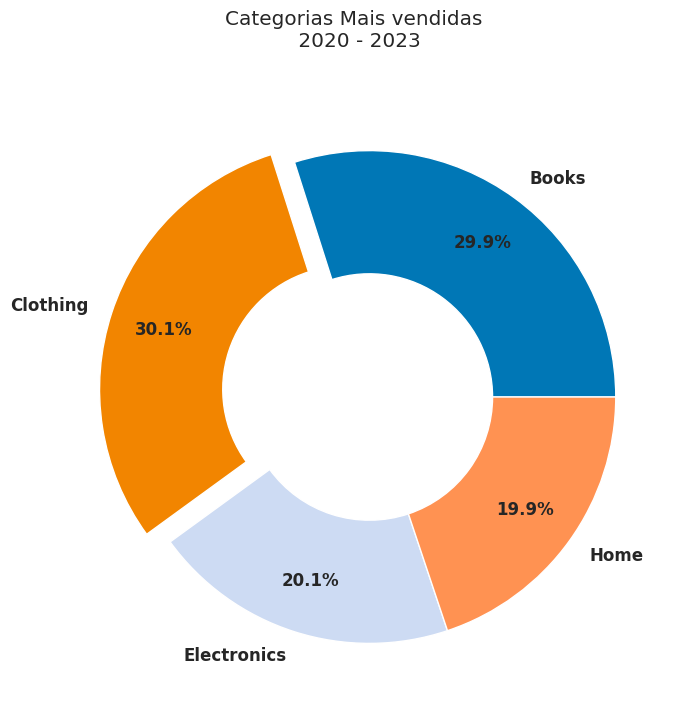

In [246]:
df_vis3 = df_new[['Product Category','Quantity']]
df_vis3 = df_vis3.groupby(['Product Category']).aggregate("sum")
df_vis3

fig,ax= plt.subplots(figsize=(10,8))

cores=[AZUL2,LARANJA1,AZUL5,LARANJA2]

plt.suptitle("Categorias Mais vendidas \n 2020 - 2023")
explode = [0.1 if categoria == 'Clothing' else 0 for categoria in df_vis3.index]
ax.pie(data=df_vis3, x='Quantity', labels=df_vis3.index,colors=cores,explode=explode, autopct='%1.1f%%', startangle=0, pctdistance=0.78,wedgeprops=dict(width=0.5),textprops=dict(size=12,fontweight="bold"))
plt.show()


# Analise 4

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Total_paid             138490 non-null  int6

In [124]:

df_vis4 = df_new[['Product Category','NPS']].copy()
df_vis4= df_vis4.groupby(['Product Category']).aggregate("mean")
df_vis4



,NPS
Product Category,
Books,5.021954
Clothing,4.995396
Electronics,4.948285
Home,5.007271


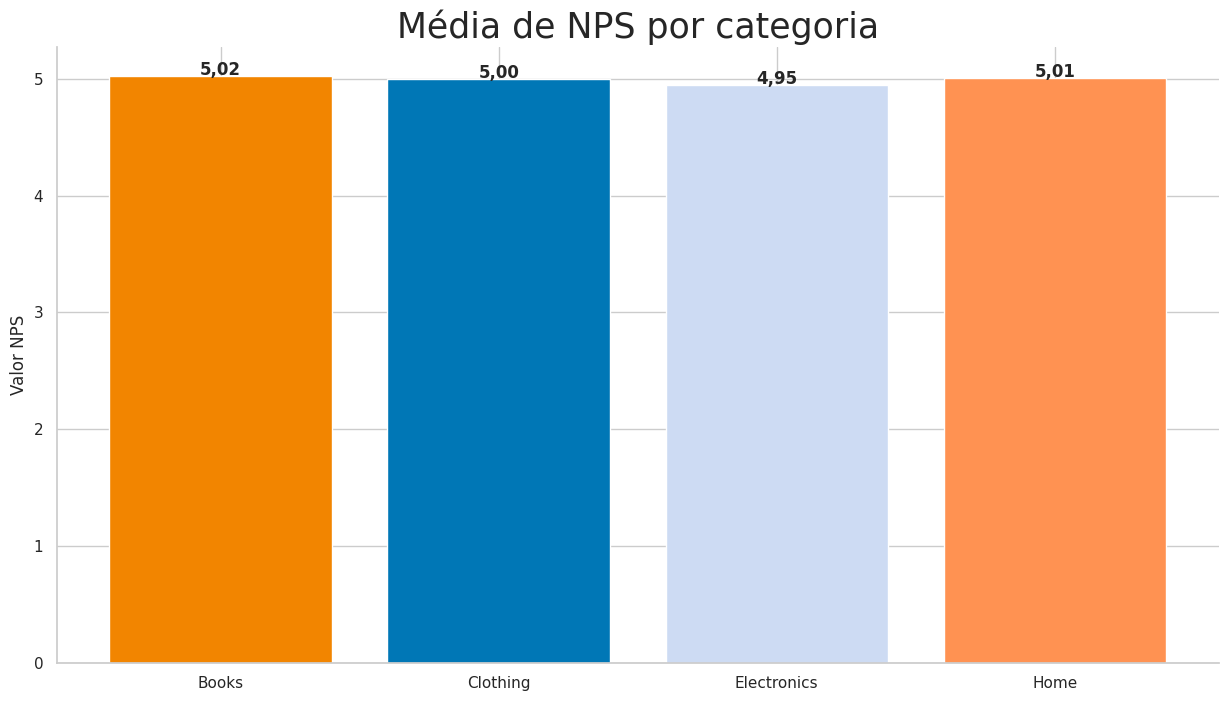

In [247]:
cores = [LARANJA1, AZUL2,AZUL5,LARANJA2]
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df_vis4.index,df_vis4['NPS'], color=cores)

for i, valor in enumerate(df_vis4['NPS']):
    nps=f'{valor:,.2f}'.replace(".",",")

    ax.text(i,valor+0.05  , nps, fontsize=12,ha='center',va='center',weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Média de NPS por categoria",fontsize=25)
ax.set_ylabel("Valor NPS")

plt.show()

# Outras Analises

In [134]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Total_paid             138490 non-null  int6

In [144]:
#Por genero
df_vis5= df_new[["Quantity","Gender","Product Category"]].copy()

df_sales_by_gender = df_vis5.groupby('Gender')['Quantity'].sum().reset_index()
df_vis5 = df_vis5.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index()


df_vis5


,Gender,Product Category,Quantity
0,Female,Books,62453
1,Female,Clothing,63408
2,Female,Electronics,41824
3,Female,Home,41723
4,Male,Books,61929
5,Male,Clothing,61726
6,Male,Electronics,41862
7,Male,Home,40875


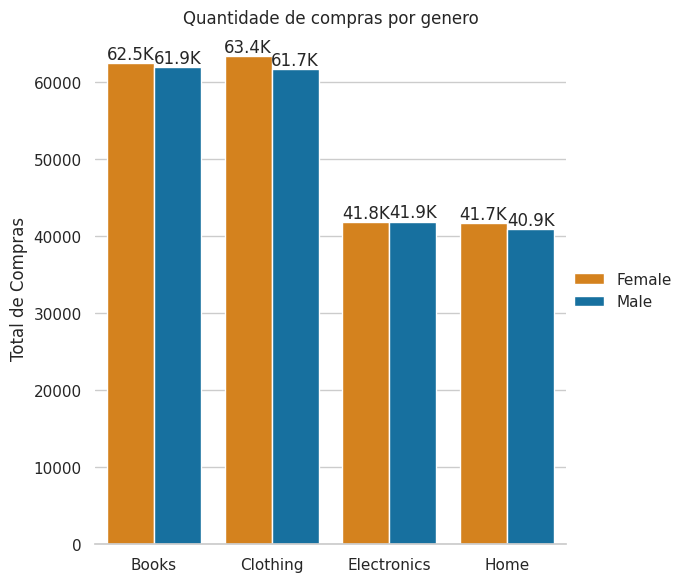

In [248]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cores= LARANJA1,AZUL2

# catplot

g = sns.catplot(
    data=df_vis5, kind="bar",
    x="Product Category", y="Quantity", hue="Gender",
    errorbar="sd", palette=cores, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Total de Compras")
g.legend.set_title("")
g.set(title='Quantidade de compras por genero')
ax = g.axes.flat[0]

#colocando valorem em cima das barras
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [154]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138490 entries, 0 to 138489
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            138490 non-null  int64         
 1   Purchase Date          138490 non-null  datetime64[ns]
 2   Product Category       138490 non-null  object        
 3   Product Price          138490 non-null  int64         
 4   Quantity               138490 non-null  int64         
 5   Total Purchase Amount  138490 non-null  int64         
 6   NPS                    138490 non-null  int64         
 7   Customer Age           138490 non-null  int64         
 8   Gender                 138490 non-null  object        
 9   Source                 138490 non-null  object        
 10  Country                138490 non-null  object        
 11  State                  138490 non-null  object        
 12  Total_paid             138490 non-null  int6

In [219]:
#Faixa etaria
df_vis6=df_new[['Quantity','Customer Age ']].copy()
bins = [18, 28,38,48,58,70]
labels = ['18-28 anos','29-38 anos','39-48 anos','49-58 anos','59-70 anos']
df_vis6['faixa_etaria'] = pd.cut(df_vis6['Customer Age '], bins=bins, labels=labels, right=False)


df_vis6

,Quantity,Customer Age,faixa_etaria
0,3,20,18-28 anos
1,4,20,18-28 anos
2,2,20,18-28 anos
3,1,20,18-28 anos
4,1,20,18-28 anos
...,...,...,...
138485,2,50,49-58 anos
138486,5,50,49-58 anos
138487,1,50,49-58 anos
138488,4,50,49-58 anos


In [220]:
df_vis6.drop('Customer Age ',axis=1,inplace=True)
df_vis6
df_vis6 = df_vis6.groupby(['faixa_etaria']).aggregate("sum")
df_vis6

,Quantity
faixa_etaria,
18-28 anos,82840
29-38 anos,78767
39-48 anos,78808
49-58 anos,75160
59-70 anos,91757


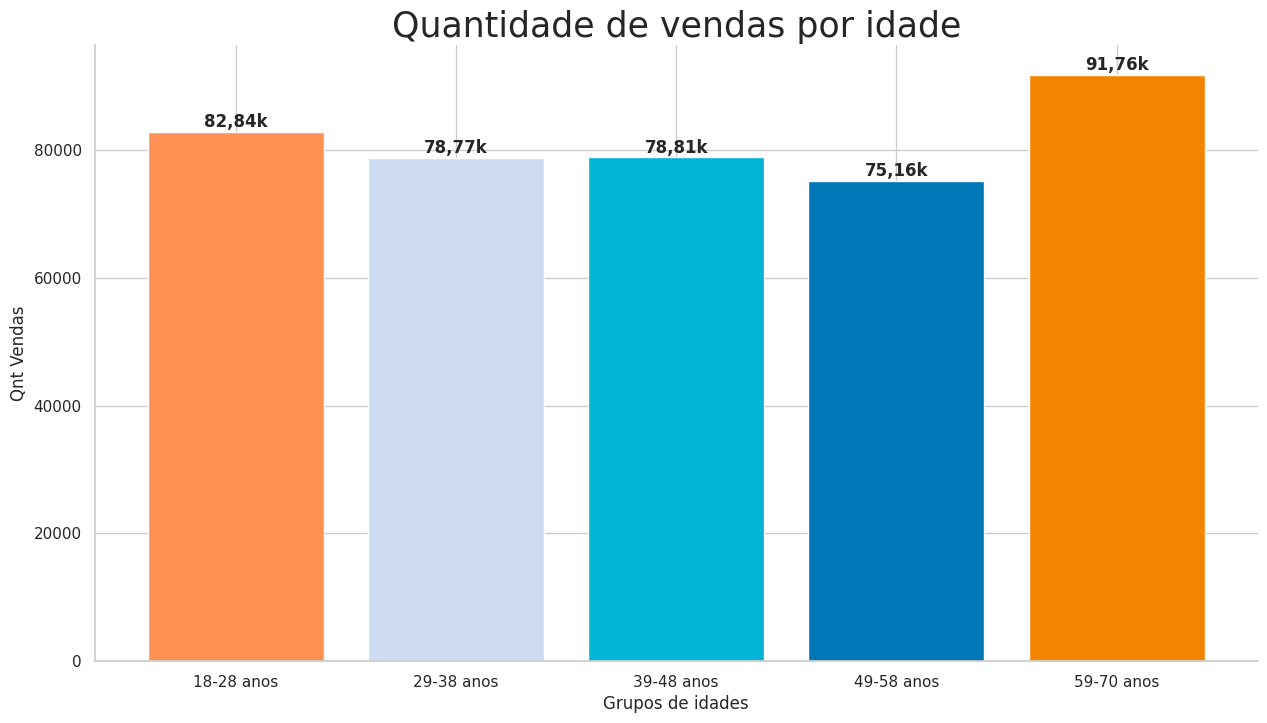

In [250]:
cores = [LARANJA2, AZUL5,AZUL3,AZUL2,LARANJA1]
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df_vis6.index,df_vis6['Quantity'], color=cores)

for i, valor in enumerate(df_vis6['Quantity']):
  Quantity=f'{valor/1000:,.2f}k'.replace(".",",")

  ax.text(i,valor+1500  , Quantity, fontsize=12,ha='center',va='center',weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Quantidade de vendas por idade", fontsize=25)
ax.set_ylabel("Qnt Vendas")
ax.set_xlabel("Grupos de idades")
plt.show()